In [1]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean
spark = SparkSession.builder \
    .appName("Tarea_estadistica") \
    .getOrCreate()

In [2]:
data = pd.ExcelFile('capturas_2015-2020.xlsx')

In [3]:
df_2015 = spark.createDataFrame(data.parse(str(2015)))
df_2016 = spark.createDataFrame(data.parse(str(2016)))
df_2017 = spark.createDataFrame(data.parse(str(2017)))
df_2019 = spark.createDataFrame(data.parse(str(2019)).rename(columns={'DiaphorinaXTrampa': 'No_DiaphorinasXtrampa'}))
df_2020 = spark.createDataFrame(data.parse(str(2020)).rename(columns={'DiaphorinaXTrampa': 'No_DiaphorinasXtrampa'}))

In [4]:
###1.Hacer una grafica del promedio de Diaphorinas por trampa para cada mes de los años 2015, 2017,2020. Es decir 
#una grafica por cada año donde el eje horizontal este el mes y el vertical el promedio de diaphorinas por trampa.

promedios = {}
años= [2015, 2017, 2020]

for year in años:
    if year == 2015:
        df_year = df_2015
    elif year == 2017:
        df_year = df_2017
    else:
        df_year = df_2020 
    promedio_diaphorinas = df_year.groupBy('Mes', 'Ubicacion') \
                                   .agg(mean('No_DiaphorinasXtrampa').alias('PromedioDiaphorinas')) \
                                   .orderBy('Mes')
    promedios[year] = promedio_diaphorinas.toPandas()


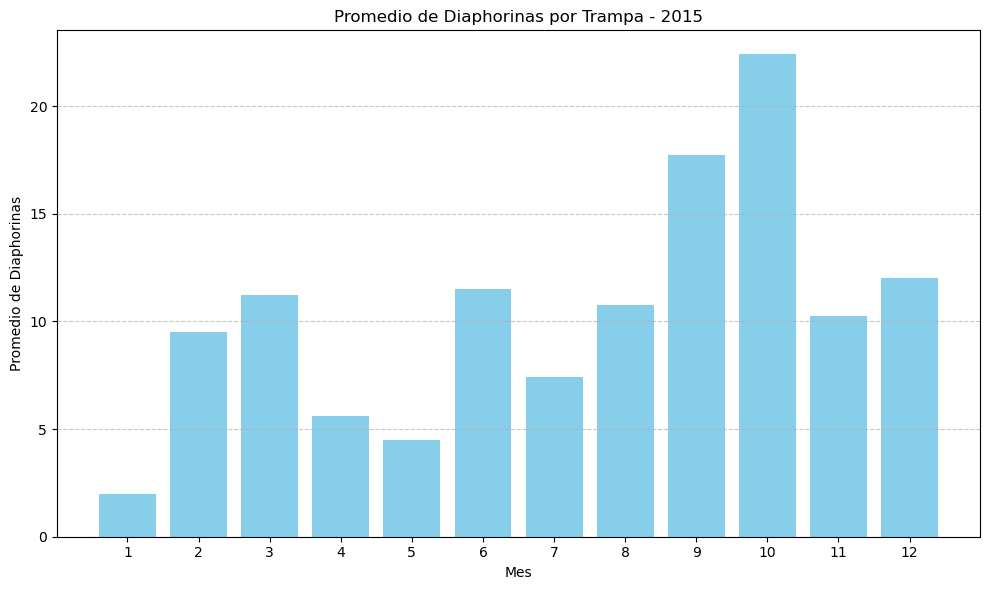

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(promedios[2015]['Mes'], promedios[2015]['PromedioDiaphorinas'], color='skyblue')
plt.title('Promedio de Diaphorinas por Trampa - 2015')
plt.xlabel('Mes')
plt.ylabel('Promedio de Diaphorinas')
plt.xticks(range(1, 13)) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


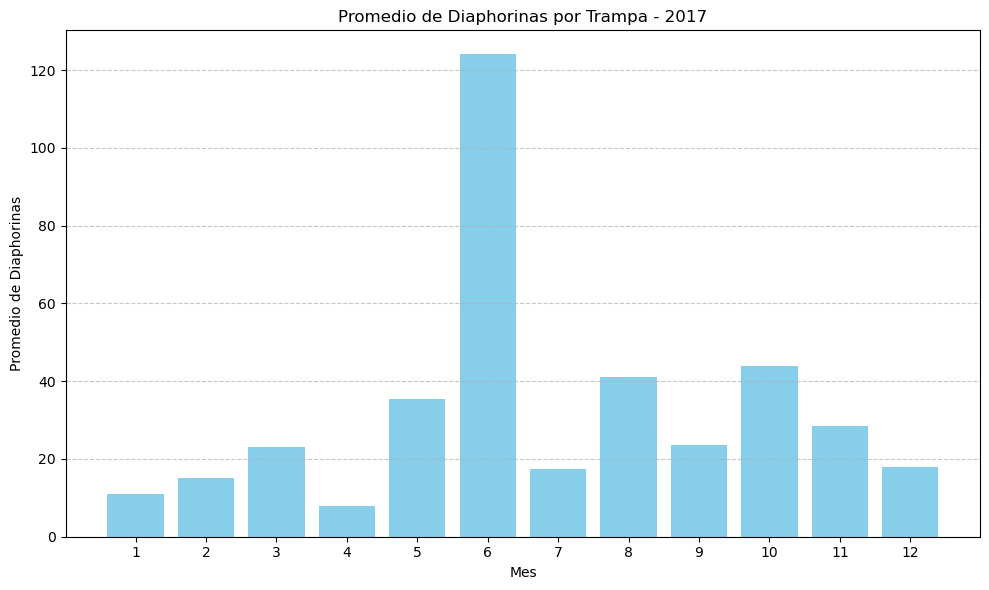

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(promedios[2017]['Mes'], promedios[2017]['PromedioDiaphorinas'], color='skyblue')
plt.title('Promedio de Diaphorinas por Trampa - 2017')
plt.xlabel('Mes')
plt.ylabel('Promedio de Diaphorinas')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

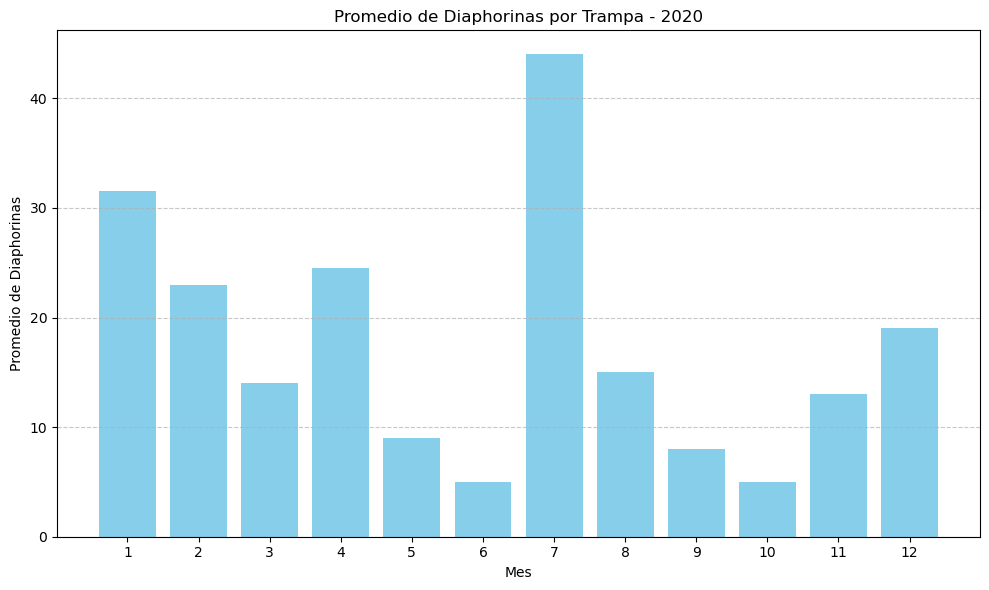

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(promedios[2020]['Mes'], promedios[2020]['PromedioDiaphorinas'], color='skyblue')
plt.title('Promedio de Diaphorinas por Trampa - 2020')
plt.xlabel('Mes')
plt.ylabel('Promedio de Diaphorinas')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

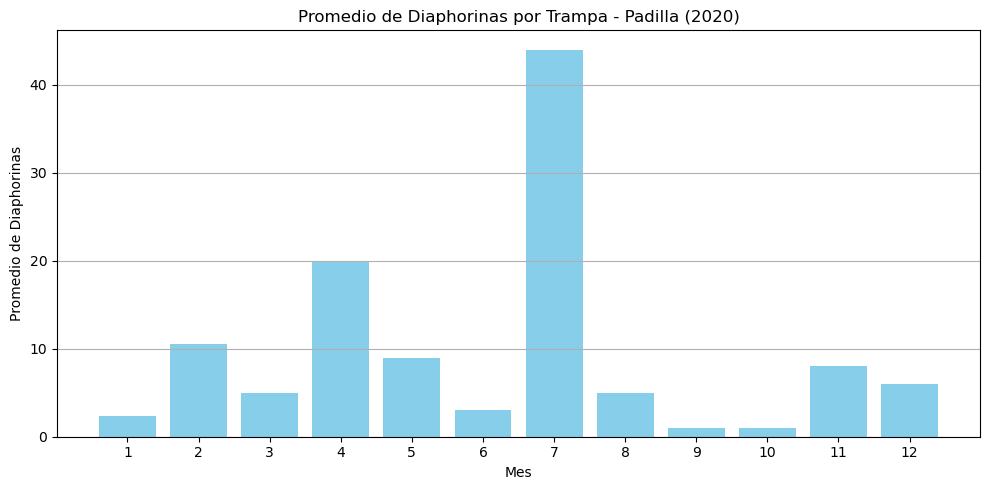

In [8]:
###2.Hacer una grafica del promedio de Diaphorinas por trampa para cada mes del ano 2020 per solo de un municipio.
import matplotlib.pyplot as plt
df_municipio = df_2020.filter(df_2020['Municipio'] == 'PADILLA')
promedio_mensual = df_municipio.groupBy('Mes', 'Ubicacion') \
                                 .agg(mean('No_DiaphorinasXtrampa').alias('PromedioDiaphorinas')) \
                                 .orderBy('Mes')
promedio_mensual_df = promedio_mensual.toPandas()
plt.figure(figsize=(10, 5))
plt.bar(promedio_mensual_df['Mes'], promedio_mensual_df['PromedioDiaphorinas'], color='skyblue')
plt.title('Promedio de Diaphorinas por Trampa - Padilla (2020)')
plt.xlabel('Mes')
plt.ylabel('Promedio de Diaphorinas')
plt.xticks(promedio_mensual_df['Mes'].unique())
plt.grid(axis='y') 
plt.tight_layout()
plt.show()


In [9]:
###3.Hacer una tabla donde la primera columna sea el mes, la segunda el ındice Id (por trampa) y la tercera el ındice Cx
#para el ano 2015.
from pyspark.sql.functions import variance
media_varianza = df_2015.groupBy('Mes', 'Ubicacion') \
    .agg(mean('No_DiaphorinasXtrampa').alias('Media'),
         variance('No_DiaphorinasXtrampa').alias('Varianza'))
media_varianza = media_varianza.withColumn('Id', media_varianza['Varianza'] / media_varianza['Media']) \
                               .withColumn('Cx', (media_varianza['Varianza'] / media_varianza['Media']) - 1)
tabla_resultado = media_varianza.groupBy('Mes') \
    .agg(mean('Id').alias('Id'), mean('Cx').alias('Cx')) \
    .orderBy('Mes')
tabla_resultado.show()

+----+------------------+------------------+
| Mes|                Id|                Cx|
+----+------------------+------------------+
| 1.0|1.3333333333333333|0.3333333333333334|
| 2.0|1.5518068844768025|0.5518068844768027|
| 3.0|  1.95521394850497|0.9552139485049738|
| 4.0|1.6070147960855599|0.6070147960855589|
| 5.0| 1.378070072604784|0.3780700726047846|
| 6.0|  1.67061513034008|0.6706151303400814|
| 7.0|1.6073213594555222| 0.607321359455521|
| 8.0| 1.775026832240134|0.7750268322401356|
| 9.0|2.3535119901989177| 1.353511990198921|
|10.0| 2.126256404894552|1.1262564048945518|
|11.0|1.8398149152695114|0.8398149152695128|
|12.0|1.5855013905058422|0.5855013905058425|
| NaN|               NaN|               NaN|
+----+------------------+------------------+



In [46]:
#4.Hacer una grafica del ındice Id (por trampa) como funcion del mes que abarque desde 2015 hasta 2020.
tabla_resultado_2015= tabla_resultado.select("Mes", "Id")
tabla_resultado_2015.show()
media_varianza_2016 = df_2016.groupBy('Mes', 'Ubicacion') \
    .agg(mean('No_DiaphorinasXtrampa').alias('Media'),
         variance('No_DiaphorinasXtrampa').alias('Varianza'))
media_varianza_2016 = media_varianza_2016.withColumn('Id', media_varianza_2016['Varianza'] / media_varianza_2016['Media'])
tabla_resultado_2016 = media_varianza_2016.groupBy('Mes') \
    .agg(mean('Id').alias('Id') ) \
    .orderBy('Mes')
tabla_resultado_2016.show()

media_varianza_2017 = df_2017.groupBy('Mes', 'Ubicacion') \
    .agg(mean('No_DiaphorinasXtrampa').alias('Media'),
         variance('No_DiaphorinasXtrampa').alias('Varianza'))
media_varianza_2017 = media_varianza_2017.withColumn('Id', media_varianza_2017['Varianza'] / media_varianza_2017['Media'])
tabla_resultado_2017 = media_varianza_2017.groupBy('Mes') \
    .agg(mean('Id').alias('Id') ) \
    .orderBy('Mes')
tabla_resultado_2017.show()

media_varianza_2019 = df_2019.groupBy('Mes', 'Ubicacion') \
    .agg(mean('No_DiaphorinasXtrampa').alias('Media'),
         variance('No_DiaphorinasXtrampa').alias('Varianza')).dropna()
media_varianza_2019 = media_varianza_2019.withColumn('Id', media_varianza_2019['Varianza'] / media_varianza_2019['Media'])
tabla_resultado_2019 = media_varianza_2019.groupBy('Mes') \
    .agg(mean('Id').alias('Id') ) \
    .orderBy('Mes')
tabla_resultado_2019.show()

media_varianza_2020 = df_2020.groupBy('Mes', 'Ubicacion') \
    .agg(mean('No_DiaphorinasXtrampa').alias('Media'),
         variance('No_DiaphorinasXtrampa').alias('Varianza')).dropna()
media_varianza_2020 = media_varianza_2020.withColumn('Id', media_varianza_2020['Varianza'] / media_varianza_2020['Media'])
tabla_resultado_2020 = media_varianza_2020.groupBy('Mes') \
    .agg(mean('Id').alias('Id') ) \
    .orderBy('Mes')
tabla_resultado_2020.show()
##marcaba un error al ejecutarlo en ciclo

+----+------------------+
| Mes|                Id|
+----+------------------+
| 1.0|1.3333333333333333|
| 2.0|1.5518068844768025|
| 3.0|  1.95521394850497|
| 4.0|1.6070147960855599|
| 5.0| 1.378070072604784|
| 6.0|  1.67061513034008|
| 7.0|1.6073213594555222|
| 8.0| 1.775026832240134|
| 9.0|2.3535119901989177|
|10.0| 2.126256404894552|
|11.0|1.8398149152695114|
|12.0|1.5855013905058422|
| NaN|               NaN|
+----+------------------+

+---+------------------+
|Mes|                Id|
+---+------------------+
|  1|1.8017815320138595|
|  2|1.9813774972634282|
|  3|2.8283698828429285|
|  4|1.9655365971221104|
|  5|2.0545286011549626|
|  6|1.6975978455620737|
|  7| 1.432730042473959|
|  8|1.8400081547245257|
|  9|1.9536663485114425|
| 10| 1.760763571705553|
| 11|2.3051727954822674|
| 12|1.4832077326343382|
+---+------------------+

+---+------------------+
|Mes|                Id|
+---+------------------+
|  1|              NULL|
|  2| 2.353256438947722|
|  3|  3.01408301442698|
|  4| 

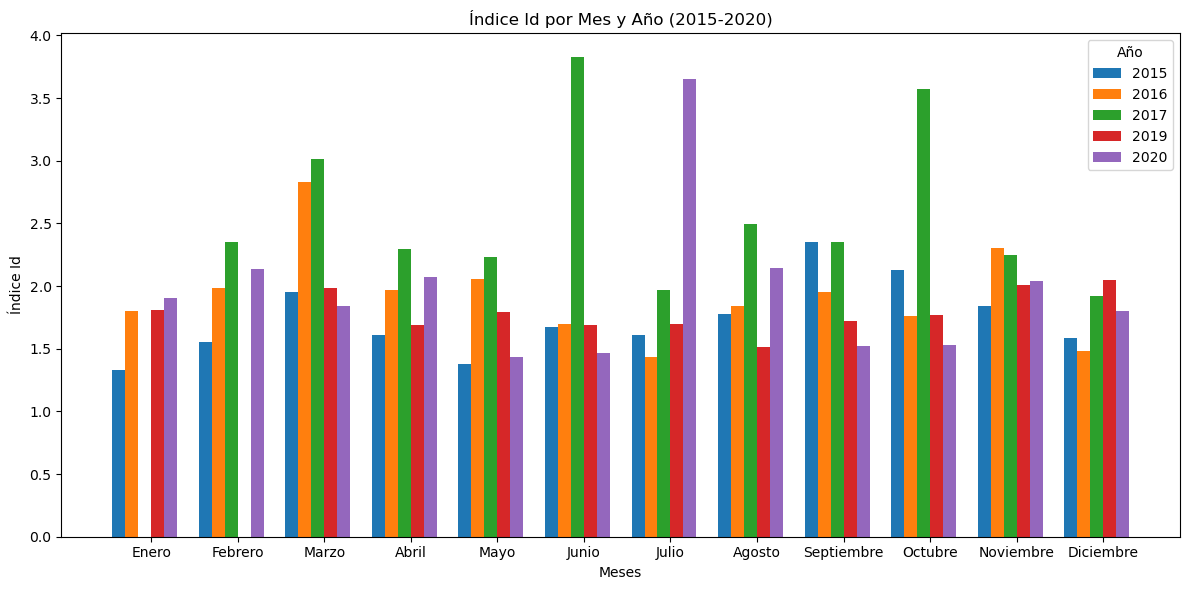

In [62]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import lit
import matplotlib.pyplot as plt
tabla_resultado_2015 = tabla_resultado_2015.withColumn("Año", lit(2015))
tabla_resultado_2016 = tabla_resultado_2016.withColumn("Año", lit(2016))
tabla_resultado_2017 = tabla_resultado_2017.withColumn("Año", lit(2017))
tabla_resultado_2019 = tabla_resultado_2019.withColumn("Año", lit(2019))
tabla_resultado_2020 = tabla_resultado_2020.withColumn("Año", lit(2020))
resultado = (tabla_resultado_2015
             .union(tabla_resultado_2016)
             .union(tabla_resultado_2017)
             .union(tabla_resultado_2019)
             .union(tabla_resultado_2020))
resultado_pandas = resultado.toPandas()
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
resultado_pandas = resultado_pandas.sort_values(by=["Mes", "Año"])
años_2 = resultado_pandas["Año"].unique()

x = range(len(meses))
width = 0.15
fig, ax = plt.subplots(figsize=(12, 6))
for i, year in enumerate(años_2):
    data_year = resultado_pandas[resultado_pandas["Año"] == year]
    ax.bar(data_year["Mes"] + i * ancho_barra, data_year["Id"], width=ancho_barra, label=str(year))

ax.set_xlabel('Meses')
ax.set_ylabel('Índice Id')
ax.set_title('Índice Id por Mes y Año (2015-2020)')
ax.set_xticks([meses +1+ ancho_barra * (len(años_2) ) / 2 for meses in x]) 
ax.set_xticklabels(meses)
ax.legend(title='Año')
plt.tight_layout()
plt.show()


In [96]:
###5.Hacer una grafica del centro de masa de las diaphorinas como funcion del mes que abarque de 2017 a 2020. Nota : 
###CM=pos*Diaph/Ntrampas, donde CM se refiere al centro de masa, pos es la posicion de la trampa, Diaph es el promedio de
###diaphorinas en la trampa y Ntrampas es el numero de trampas que se consideraron en el calculo.
from pyspark.sql import functions as F
from functools import reduce
from pyspark.sql import DataFrame
from pyspark.sql.functions import lit

columnas_comunes = ["Latitud", "Longitud","Ubicacion", 
    "Municipio", "No_DiaphorinasXtrampa", 
    "Mes"
]

a=df_2017.select(columnas_comunes).withColumn("Año", lit(2017))
b=df_2019.select(columnas_comunes).withColumn("Año", lit(2019))
c=df_2020.select(columnas_comunes).withColumn("Año", lit(2020))

df_all = a.union(b).union(c).dropna()

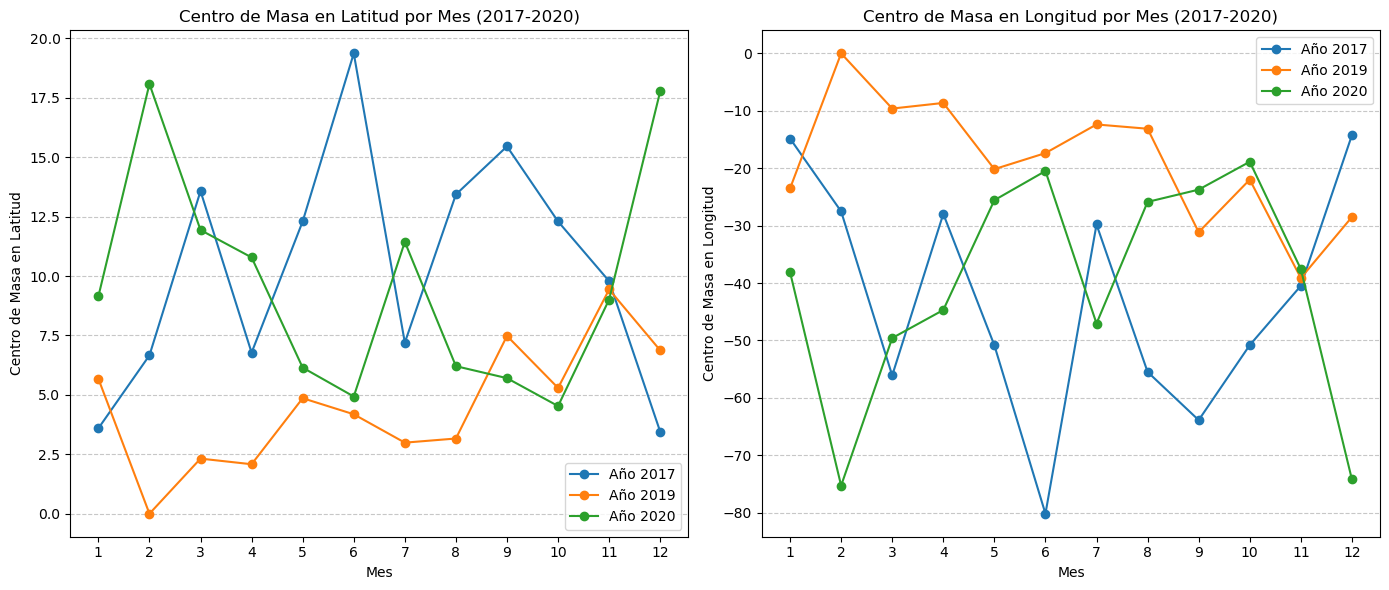

In [97]:
cm_data = []

for year in [2017, 2019, 2020]:
    for month in range(1, 13):
        df_month = df_all.filter((F.col("Año") == year) & (F.col("Mes") == month))

        if df_month.count() == 0:
            continue
        promedio_diaph = df_month.groupBy("Ubicacion") \
            .agg(F.mean("No_DiaphorinasXtrampa").alias("Promedio_Diaph"),
                 F.first("Latitud").alias("Latitud"),
                 F.first("Longitud").alias("Longitud"))

        N_trampas = promedio_diaph.count()

        # Calcular CM en latitud y longitud
        cm_latitud = (promedio_diaph.select((F.col("Latitud") * F.col("Promedio_Diaph")).alias("CM_Latitud")).agg(F.sum("CM_Latitud")).first()[0]) / N_trampas
        cm_longitud = (promedio_diaph.select((F.col("Longitud") * F.col("Promedio_Diaph")).alias("CM_Longitud")).agg(F.sum("CM_Longitud")).first()[0]) / N_trampas

        cm_data.append({'Año': year, 'Mes': month, 'CM_Latitud': cm_latitud, 'CM_Longitud': cm_longitud})
cm_df = pd.DataFrame(cm_data)

plt.figure(figsize=(14, 6))

# Gráfico para el Centro de Masa en Latitud
plt.subplot(1, 2, 1)
for year in [2017, 2019, 2020]:
    cm_df_year = cm_df[cm_df['Año'] == year]
    plt.plot(cm_df_year['Mes'], cm_df_year['CM_Latitud'], label=f'Año {year}', marker='o')
plt.title('Centro de Masa en Latitud por Mes (2017-2020)')
plt.xlabel('Mes')
plt.ylabel('Centro de Masa en Latitud')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico para el Centro de Masa en Longitud
plt.subplot(1, 2, 2)
for year in [2017, 2019, 2020]:
    cm_df_year = cm_df[cm_df['Año'] == year]
    plt.plot(cm_df_year['Mes'], cm_df_year['CM_Longitud'], label=f'Año {year}', marker='o')
plt.title('Centro de Masa en Longitud por Mes (2017-2020)')
plt.xlabel('Mes')
plt.ylabel('Centro de Masa en Longitud')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
spark.stop()